<a href="https://colab.research.google.com/github/olewejoseph/git_practice/blob/master/Joseph_Olewe_Independent_Project_2_More_Data%2C_More_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to the Karamoja Food Security Monitoring**

Karamoja, the most food-insecure region of Uganda, is plagued by low agricultural productivity due to intense droughts and frequent pest and disease outbreaks. The region, covering an area of 27,528 square kilometers and comprising districts such as Kotido, Kaabong, Moroto, and others, is home to approximately 1.4 million people. The local economy heavily relies on cattle rearing and small-scale agriculture, particularly the cultivation of staple crops like sorghum and maize. However, ongoing environmental challenges have significantly affected crop yields, leading to chronic food insecurity.

The harsh conditions in Karamoja have drawn the attention of various NGOs, which provide technical support and farm inputs to local farmers. Despite these efforts, there remains a lack of comprehensive visibility into the region’s agricultural performance, making it difficult for these organizations to prioritize their activities effectively. To address this gap, Dalberg Data Insights (DDI) was requested to develop a food security monitoring tool for one of the NGOs active in Karamoja.

Leveraging satellite imagery and advanced agri-tech methodologies, DDI has developed a model to remotely measure the yield of sorghum and maize—the two main staple crops in the region—for the 2017 crop season. This interactive dashboard serves as a preliminary mockup of the Food Security Monitoring tool. It provides crucial insights into crop productivity at both the district and sub-county levels, offering a valuable resource for decision-makers aiming to enhance food security in Karamoja.

This dashboard not only visualizes the productivity of sorghum and maize but also contextualizes the data within the broader challenges faced by the Karamoja region. From its historical struggles with famine and armed conflict to its ongoing battles with poverty and environmental degradation, Karamoja's story is one of resilience amidst adversity. By offering a comprehensive view of agricultural performance, this tool aims to support the strategic planning necessary to alleviate food insecurity and promote sustainable development in the region.

# **Set Up**

In [ ]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#Load the dataset
file_path = '/content/Uganda_Karamoja_District_Crop_Yield_Population[1].csv'
df = pd.read_csv(file_path)

file_path1 = '/content/Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv'
df1 = pd.read_csv(file_path)



```
# This is formatted as code
```

# Explore df Data

In [ ]:
#Display the first 5 rows of df
df.head()

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468


In [ ]:
# Check the shape of the DataFrame
df.shape

(7, 11)

In [ ]:
#Infromation on the types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      7 non-null      int64  
 1   NAME          7 non-null      object 
 2   POP           7 non-null      int64  
 3   Area          7 non-null      int64  
 4   S_Yield_Ha    7 non-null      int64  
 5   M_Yield_Ha    7 non-null      int64  
 6   Crop_Area_Ha  7 non-null      float64
 7   S_Area_Ha     7 non-null      float64
 8   M_Area_Ha     7 non-null      float64
 9   S_Prod_Tot    7 non-null      int64  
 10  M_Prod_Tot    7 non-null      int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 744.0+ bytes


In [ ]:
#Find missing infomation
df.isnull().sum()

,0
OBJECTID,0
NAME,0
POP,0
Area,0
S_Yield_Ha,0
M_Yield_Ha,0
Crop_Area_Ha,0
S_Area_Ha,0
M_Area_Ha,0
S_Prod_Tot,0


In [ ]:
# Check for duplicates
df.duplicated().sum()

0

# **Explore df1 Data**

In [ ]:
#Display the first 5 rows of df
df1.head()

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468


In [ ]:
# Check the shape of the DataFrame
df1.shape

(7, 11)

In [ ]:
#Infromation on the types of each column
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      7 non-null      int64  
 1   NAME          7 non-null      object 
 2   POP           7 non-null      int64  
 3   Area          7 non-null      int64  
 4   S_Yield_Ha    7 non-null      int64  
 5   M_Yield_Ha    7 non-null      int64  
 6   Crop_Area_Ha  7 non-null      float64
 7   S_Area_Ha     7 non-null      float64
 8   M_Area_Ha     7 non-null      float64
 9   S_Prod_Tot    7 non-null      int64  
 10  M_Prod_Tot    7 non-null      int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 744.0+ bytes


In [ ]:
#Find missing infomation
df1.isnull().sum()

,0
OBJECTID,0
NAME,0
POP,0
Area,0
S_Yield_Ha,0
M_Yield_Ha,0
Crop_Area_Ha,0
S_Area_Ha,0
M_Area_Ha,0
S_Prod_Tot,0


In [ ]:
# Check for duplicates
df1.duplicated().sum()

0

# **Merge Datasets**

In [ ]:
#Merge df and df1 based on the common column 'NAME'
merged_df = pd.merge(df, df1, on='NAME')

In [ ]:
#Display the first few rows of the new dataset
merged_df.head()

,OBJECTID_x,NAME,POP_x,Area_x,S_Yield_Ha_x,M_Yield_Ha_x,Crop_Area_Ha_x,S_Area_Ha_x,M_Area_Ha_x,S_Prod_Tot_x,...,OBJECTID_y,POP_y,Area_y,S_Yield_Ha_y,M_Yield_Ha_y,Crop_Area_Ha_y,S_Area_Ha_y,M_Area_Ha_y,S_Prod_Tot_y,M_Prod_Tot_y
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,...,92,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,...,96,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,...,20,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,...,85,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,...,5,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468


In [ ]:
# Check the shape of the merged dataFrame
merged_df.shape

(7, 21)

In [ ]:
#Infromation on the types of each column
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID_x      7 non-null      int64  
 1   NAME            7 non-null      object 
 2   POP_x           7 non-null      int64  
 3   Area_x          7 non-null      int64  
 4   S_Yield_Ha_x    7 non-null      int64  
 5   M_Yield_Ha_x    7 non-null      int64  
 6   Crop_Area_Ha_x  7 non-null      float64
 7   S_Area_Ha_x     7 non-null      float64
 8   M_Area_Ha_x     7 non-null      float64
 9   S_Prod_Tot_x    7 non-null      int64  
 10  M_Prod_Tot_x    7 non-null      int64  
 11  OBJECTID_y      7 non-null      int64  
 12  POP_y           7 non-null      int64  
 13  Area_y          7 non-null      int64  
 14  S_Yield_Ha_y    7 non-null      int64  
 15  M_Yield_Ha_y    7 non-null      int64  
 16  Crop_Area_Ha_y  7 non-null      float64
 17  S_Area_Ha_y     7 non-null      float64

In [ ]:
merged_df.columns

Index(['OBJECTID_x', 'NAME', 'POP_x', 'Area_x', 'S_Yield_Ha_x', 'M_Yield_Ha_x',
       'Crop_Area_Ha_x', 'S_Area_Ha_x', 'M_Area_Ha_x', 'S_Prod_Tot_x',
       'M_Prod_Tot_x', 'OBJECTID_y', 'POP_y', 'Area_y', 'S_Yield_Ha_y',
       'M_Yield_Ha_y', 'Crop_Area_Ha_y', 'S_Area_Ha_y', 'M_Area_Ha_y',
       'S_Prod_Tot_y', 'M_Prod_Tot_y'],
      dtype='object')

In [ ]:
#Droping duplicate rows
merged_df = merged_df.drop(['OBJECTID_y', 'POP_y', 'Area_y', 'S_Yield_Ha_y',
       'M_Yield_Ha_y', 'Crop_Area_Ha_y', 'S_Area_Ha_y', 'M_Area_Ha_y',
       'S_Prod_Tot_y', 'M_Prod_Tot_y'], axis=1).copy()

In [ ]:
#Find missing infomation
merged_df.isnull().sum()

,0
OBJECTID_x,0
NAME,0
POP_x,0
Area_x,0
S_Yield_Ha_x,0
M_Yield_Ha_x,0
Crop_Area_Ha_x,0
S_Area_Ha_x,0
M_Area_Ha_x,0
S_Prod_Tot_x,0


In [ ]:
# Check for duplicates
merged_df.duplicated().sum()

0

In [1]:
# Renaming column
merged_df = merged_df.rename(columns={'OBJECTID_x': 'OBJECTID',
                                      'POP_x': 'Population',
                                      'Area_x': 'Are',
                                      'S_Yield_Ha_x': 'Average Yield for Sorghum',
                                      'M_Yield_Ha_x': 'Average Yield for Maize',
                                      'Crop_Area_Ha_x': 'Total Crop Area',
                                      'S_Area_Ha_x': 'Total Sorghum Crop Area',
                                      'M_Area_Ha_x': 'Total Maize Crop Area',
                                      'S_Prod_Tot_x': 'Total Productivity for Sorghum',
                                      'M_Prod_Tot_x': 'Total Productivity for Maize',})

NameError: name 'merged_df' is not defined

In [ ]:
#Check to see changes
merged_df.head()

,OBJECTID,NAME,Population,Are,Average Yield for Sorghum,Average Yield for Maize,Total Crop Area,Total Sorghum Crop Area,Total Maize Crop Area,Total Productivity for Sorghum,Total Productivity for Maize
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468


# **Data Visualization**

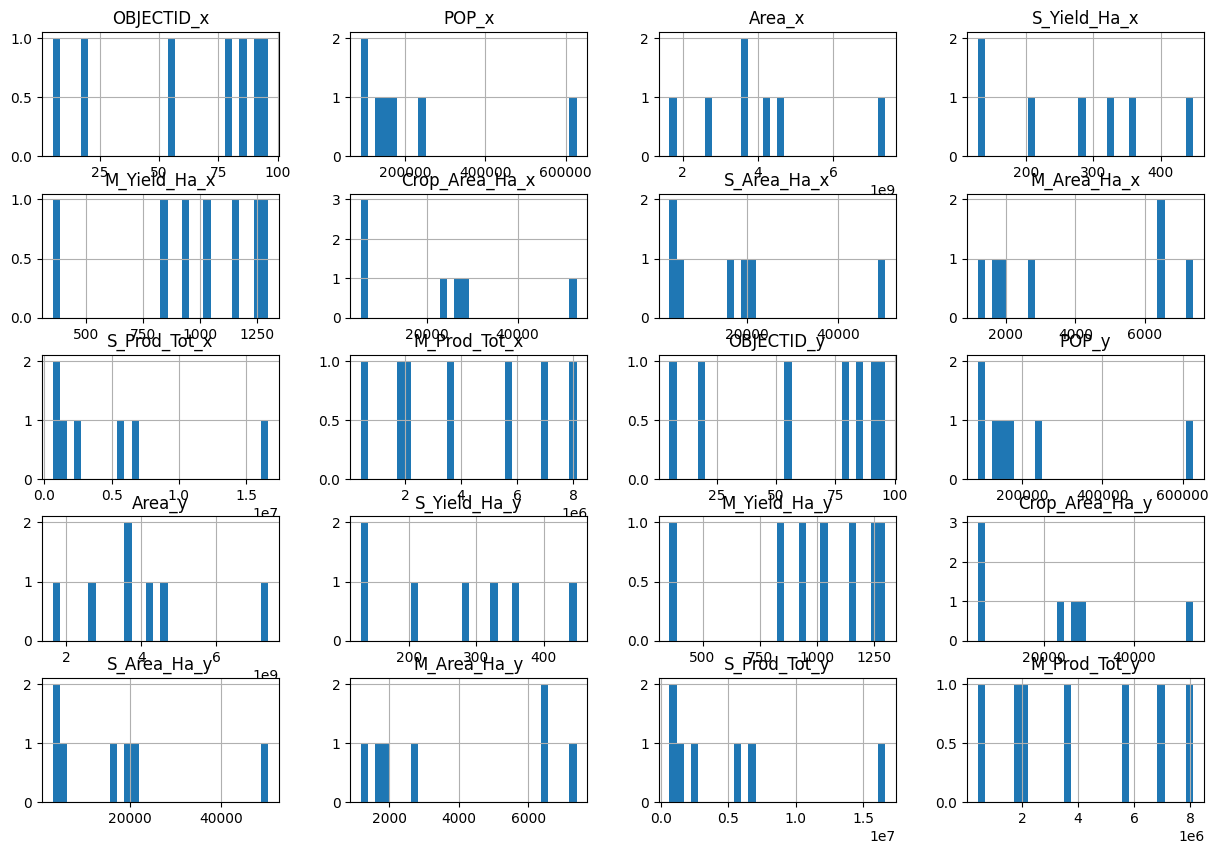

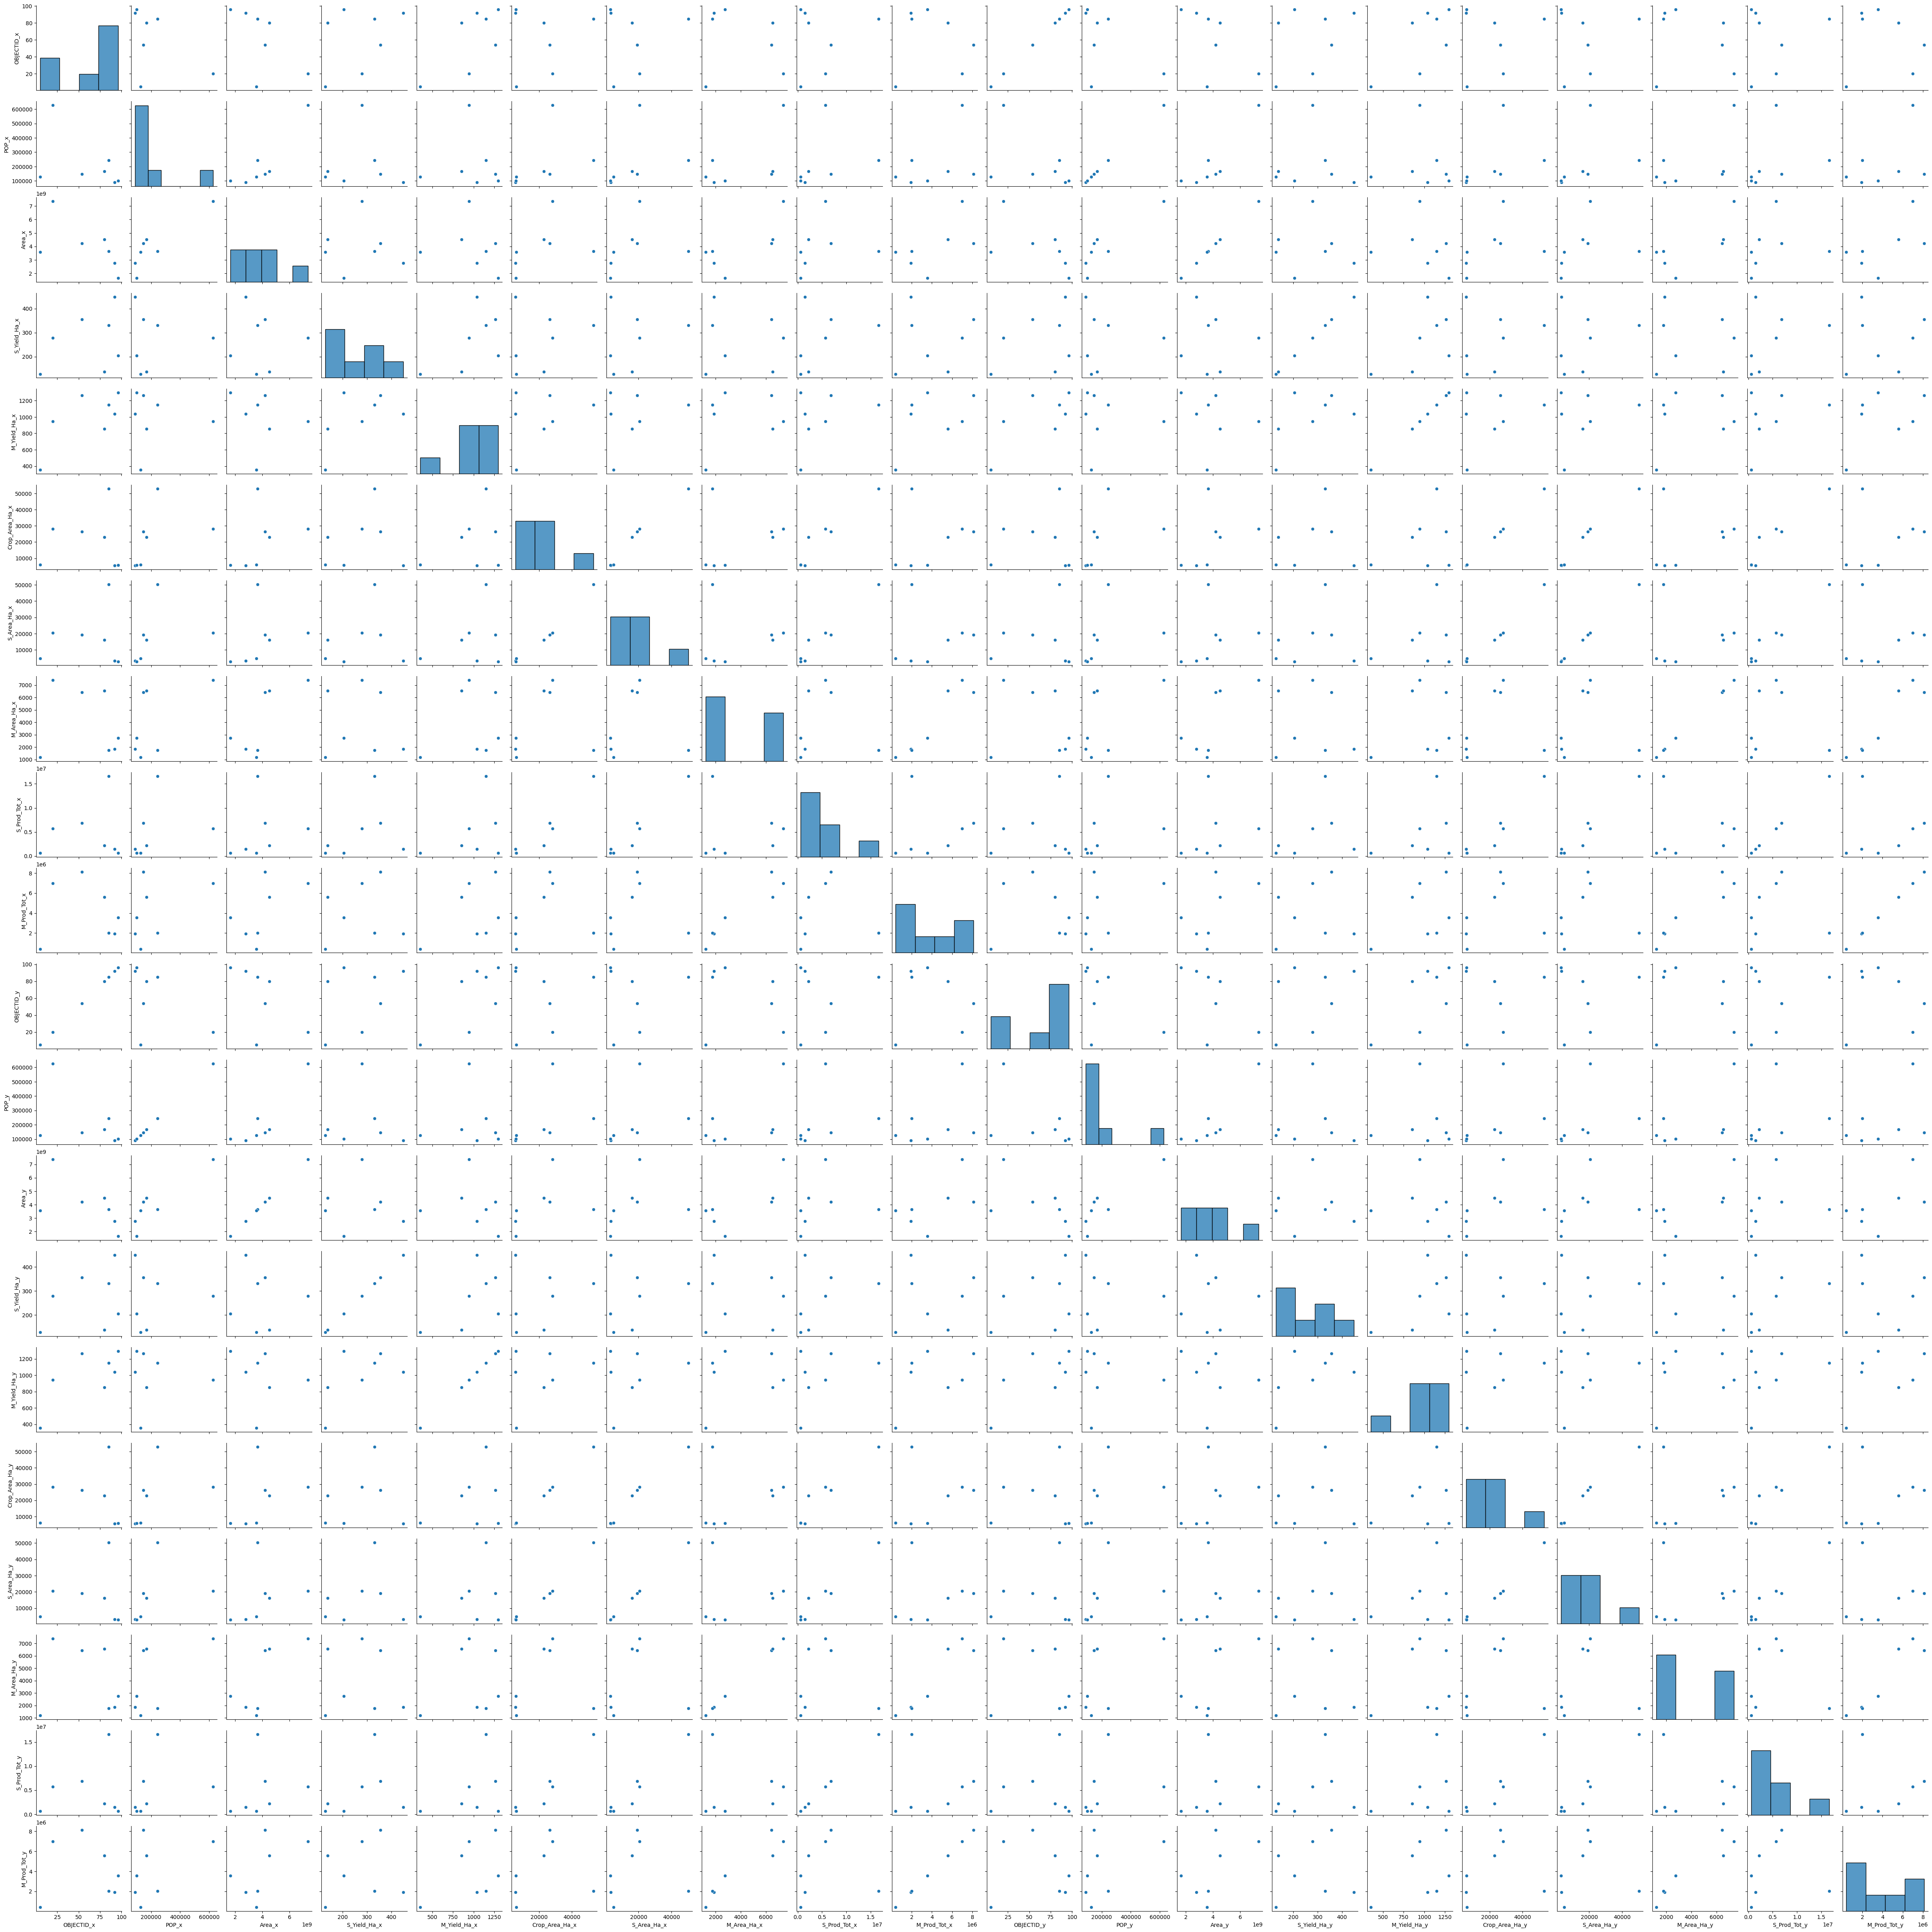

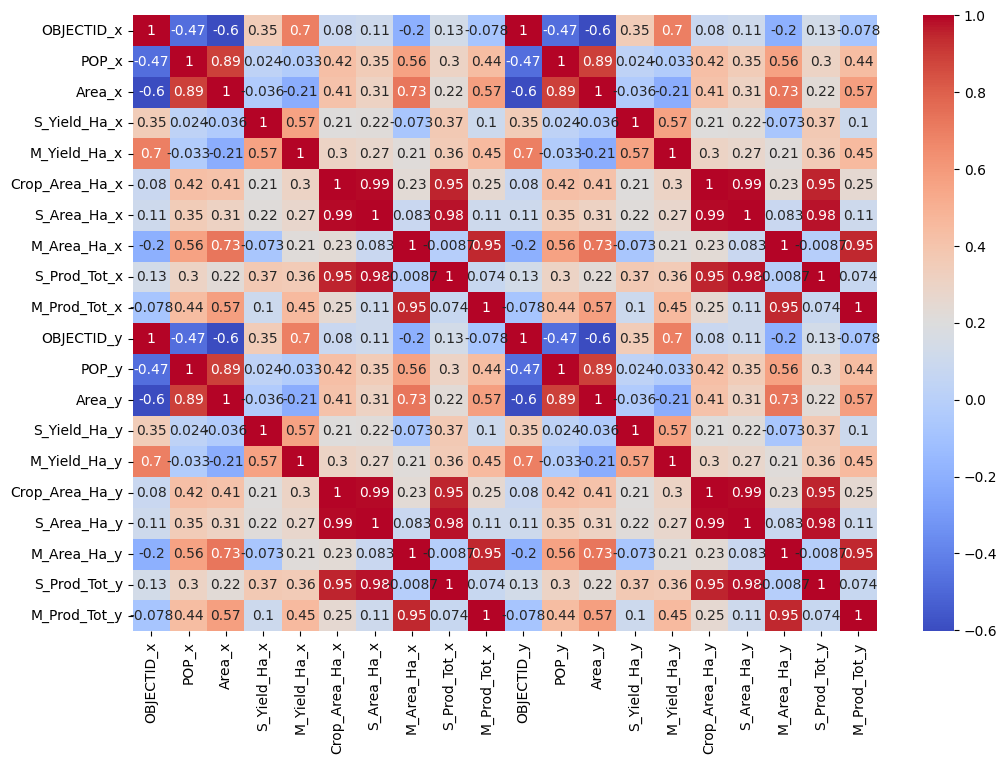

In [ ]:
# Distribution of numerical features
merged_df.hist(bins=30, figsize=(15, 10))
plt.show()

# Pairplot
sns.pairplot(merged_df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(merged_df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.show()

# **Saving Results**

In [ ]:
# Save the cleaned DataFrame to a new CSV file
merged_df.to_csv('cleaned_data.csv', index=False)

# **Conclusion**

The data analysis reveals a clear dominance in maize yield across the Karamoja region, despite the popularity of sorghum farming. Given maize's superior productivity, a strategic emphasis on expanding maize cultivation is recommended to enhance food security. Districts like Kotido and Nakapiripirit, which exhibit high yields coupled with lower population densities, present an opportunity to strengthen the region's food reserves by redistributing surplus produce and focusing on yield improvement in more populous areas.

Moving forward, the plan should prioritize maize cultivation while maintaining sorghum farming to ensure crop diversity. Expanding crop areas in districts with abundant land and favorable productivity rates, such as Kotido, will be crucial. Additionally, future efforts should explore the potential of other crops to diversify agricultural output and further secure the region's food supply. This dashboard serves as a vital tool for monitoring and strategizing these initiatives, laying the groundwork for a more food-secure Karamoja.